In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df.shape

(8807, 13)

In [5]:
df['rating'] = df['rating'].fillna('TV-MA')
df['country'] = df['country'].fillna('United States')
df['year_added'] = df['year_added'].fillna(2019)
df['director'] = df['director'].fillna('DNK')

MOVIES VS TV SHOWS ANALYSIS

In [6]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [7]:
td = df['type'].value_counts()

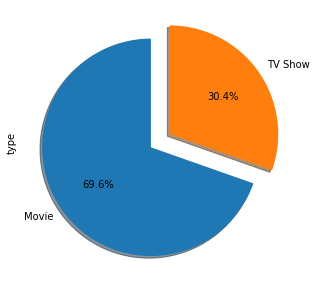

In [8]:
td.plot.pie(startangle = 90, shadow = True, explode = (0.07,0.14), autopct = '%1.1f%%',figsize = (5,5))
plt.show()

COUNTRY WISE ANALYSIS ON NETFLIX

In [9]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])

In [10]:
df.country.nunique()

86

In [11]:
df.country.value_counts().head()

United States     4042
India             1008
United Kingdom     628
Canada             271
Japan              259
Name: country, dtype: int64

In [12]:
tc = df.country.value_counts().head()

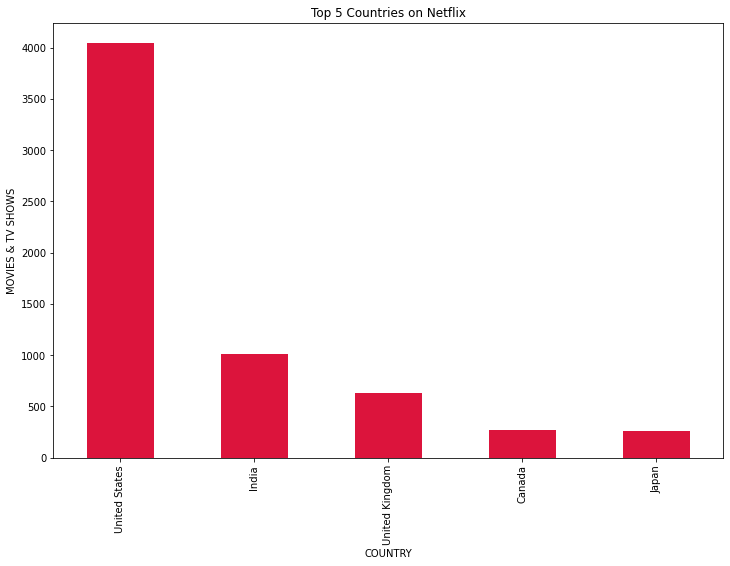

In [13]:
plt.figure(figsize = (12, 8) )
plt.title('Top 5 Countries on Netflix')
tc.plot.bar( color = 'crimson')
plt.xlabel('COUNTRY')
plt.ylabel('MOVIES & TV SHOWS')
plt.show()

CATOGORY WISE ANALYSIS

In [14]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(' , ')[0])

In [15]:
df.listed_in.value_counts().head()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64

In [16]:
tl = df.listed_in.value_counts().head()

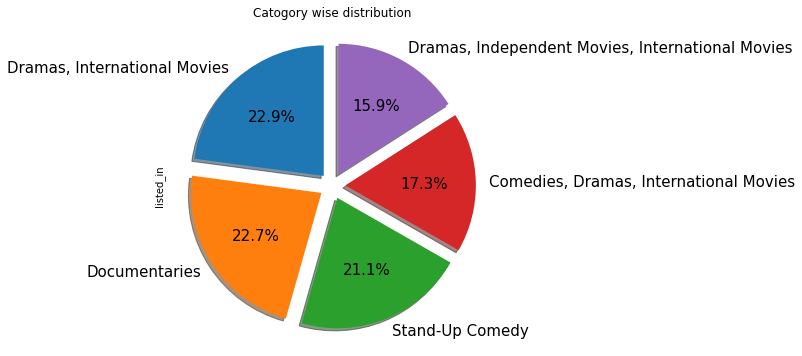

In [17]:
tl.plot.pie(startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1),shadow = True, autopct = '%1.1f%%', y = 'CATOGORIES',fontsize =15, figsize = (6,6), title = 'Catogory wise distribution')
plt.show()

CAST WISE ANALYSIS

In [18]:
df['cast'] = df['cast'].fillna('CNK')

In [19]:
df['cast'] = df['cast'].apply( lambda x: x.split(', ')[0])

In [20]:
ta = df.cast.value_counts().head(6)[1:]

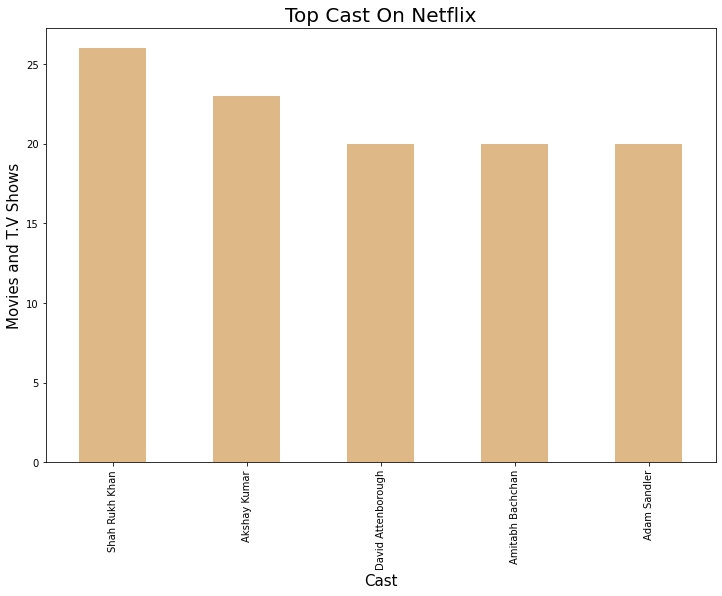

In [21]:

plt.figure(figsize = (12,8))
plt.title('Top Cast On Netflix', fontsize = 20)
plt.xlabel('Cast', fontsize = 15)
plt.ylabel('Movies and T.V Shows', fontsize = 15)
gg = ta.plot.bar(color = 'burlywood')


In [22]:
ty = df['release_year'].value_counts()

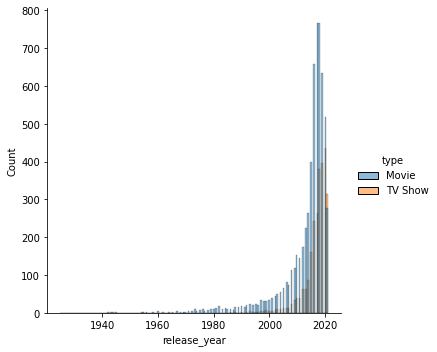

In [23]:
sns.displot(df, x='release_year', hue = 'type')